In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
from pandas.plotting import scatter_matrix

In [18]:
recent_grads_df = pd.read_csv('recent-grads.csv')

In [19]:
recent_grads_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 21 columns):
Rank                    173 non-null int64
Major_code              173 non-null int64
Major                   173 non-null object
Total                   172 non-null float64
Men                     172 non-null float64
Women                   172 non-null float64
Major_category          173 non-null object
ShareWomen              172 non-null float64
Sample_size             173 non-null int64
Employed                173 non-null int64
Full_time               173 non-null int64
Part_time               173 non-null int64
Full_time_year_round    173 non-null int64
Unemployed              173 non-null int64
Unemployment_rate       173 non-null float64
Median                  173 non-null int64
P25th                   173 non-null int64
P75th                   173 non-null int64
College_jobs            173 non-null int64
Non_college_jobs        173 non-null int64
Low_wage_jobs          

In [20]:
#select string columns
string_df = recent_grads_df.select_dtypes(include='object')
string_df.describe()

Major Major_category
count                                          173            173
unique                                         173             16
top     HEALTH AND MEDICAL ADMINISTRATIVE SERVICES    Engineering
freq                                             1             29

In [21]:
#select numerical columns
numbers_df = recent_grads_df.select_dtypes(exclude='object')
numbers_df.describe()

Rank   Major_code          Total            Men          Women  \
count  173.000000   173.000000     172.000000     172.000000     172.000000   
mean    87.000000  3879.815029   39370.081395   16723.406977   22646.674419   
std     50.084928  1687.753140   63483.491009   28122.433474   41057.330740   
min      1.000000  1100.000000     124.000000     119.000000       0.000000   
25%     44.000000  2403.000000    4549.750000    2177.500000    1778.250000   
50%     87.000000  3608.000000   15104.000000    5434.000000    8386.500000   
75%    130.000000  5503.000000   38909.750000   14631.000000   22553.750000   
max    173.000000  6403.000000  393735.000000  173809.000000  307087.000000   

       ShareWomen  Sample_size       Employed      Full_time      Part_time  \
count  172.000000   173.000000     173.000000     173.000000     173.000000   
mean     0.522223   356.080925   31192.763006   26029.306358    8832.398844   
std      0.231205   618.361022   50675.002241   42869.655092   14648.179473   
min      0.000000     2.000000       0.000000     111.000000       0.000000   
25%      0.336026    39.000000    3608.000000    3154.000000    1030.000000   
50%      0.534024   130.000000   11797.000000   10048.000000    3299.000000   
75%      0.703299   338.000000   31433.000000   25147.000000    9948.000000   
max      0.968954  4212.000000  307933.000000  251540.000000  115172.000000   

       Full_time_year_round    Unemployed  Unemployment_rate         Median  \
count            173.000000    173.000000         173.000000     173.000000   
mean           19694.427746   2416.329480           0.068191   40151.445087   
std            33160.941514   4112.803148           0.030331   11470.181802   
min              111.000000      0.000000           0.000000   22000.000000   
25%             2453.000000    304.000000           0.050306   33000.000000   
50%             7413.000000    893.000000           0.067961   36000.000000   
75%            16891.000000   2393.000000           0.087557   45000.000000   
max           199897.000000  28169.000000           0.177226  110000.000000   

              P25th          P75th   College_jobs  Non_college_jobs  \
count    173.000000     173.000000     173.000000        173.000000   
mean   29501.445087   51494.219653   12322.635838      13284.497110   
std     9166.005235   14906.279740   21299.868863      23789.655363   
min    18500.000000   22000.000000       0.000000          0.000000   
25%    24000.000000   42000.000000    1675.000000       1591.000000   
50%    27000.000000   47000.000000    4390.000000       4595.000000   
75%    33000.000000   60000.000000   14444.000000      11783.000000   
max    95000.000000  125000.000000  151643.000000     148395.000000   

       Low_wage_jobs  
count     173.000000  
mean     3859.017341  
std      6944.998579  
min         0.000000  
25%       340.000000  
50%      1231.000000  
75%      3466.000000  
max     48207.000000

In [22]:
recent_grads_df.head(2)
recent_grads_df.tail(2)

Rank  Major_code                  Major   Total    Men   Women  \
171   172        5203  COUNSELING PSYCHOLOGY  4626.0  931.0  3695.0   
172   173        3501        LIBRARY SCIENCE  1098.0  134.0   964.0   

               Major_category  ShareWomen  Sample_size  Employed  \
171  Psychology & Social Work    0.798746           21      3777   
172                 Education    0.877960            2       742   

         ...        Part_time  Full_time_year_round  Unemployed  \
171      ...              965                  2738         214   
172      ...              237                   410          87   

     Unemployment_rate  Median  P25th  P75th  College_jobs  Non_college_jobs  \
171           0.053621   23400  19200  26000          2403              1245   
172           0.104946   22000  20000  22000           288               338   

     Low_wage_jobs  
171            308  
172            192  

[2 rows x 21 columns]

### Inital Notes
173 majors, 16 falculty categories. Engineering containing the most courses

More women are students in these majors than men.

A major can have as little as 124 students and many as 400 000

Sample sizes for the survey can be as low as 2 and high as 4000

Not many missing values

In [23]:
# after dropping rows with missing columns
clean_grads_df = recent_grads_df.dropna()
print(('Dirty data: {}').format(recent_grads_df.shape[0]))
print(('Clean data: {}').format(clean_grads_df.shape[0]))

Dirty data: 173
Clean data: 172


## Scatterplots
Exploring the relationship between two selected variables

#no correlation between sample size and median salary
ax = clean_grads_df.plot(x='Sample_size', y='Median', kind='scatter')
ax.set_title('Sample_size vs. Median')

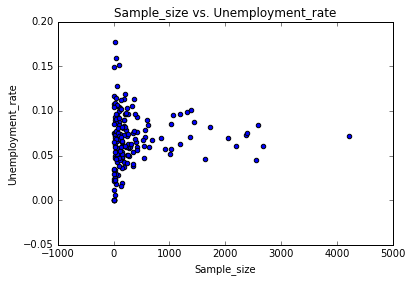

In [24]:
#no correlation between sample size and unemployment rate
ax = clean_grads_df.plot(x='Sample_size', y='Unemployment_rate', kind='scatter')
ax.set_title('Sample_size vs. Unemployment_rate')

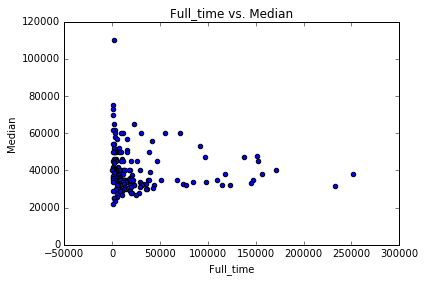

In [25]:
#no correlation between full time employment and salary
ax = clean_grads_df.plot(x='Full_time', y='Median', kind='scatter')
ax.set_title('Full_time vs. Median')

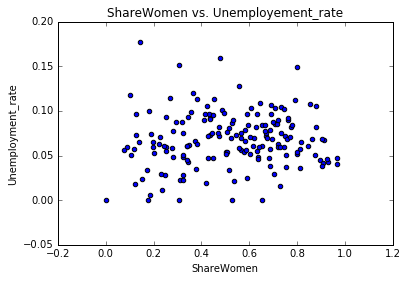

In [26]:
#no correlation between the majority of course being women and unemployment rate
ax = clean_grads_df.plot(x='ShareWomen', y='Unemployment_rate', kind='scatter')
ax.set_title('ShareWomen vs. Unemployement_rate')

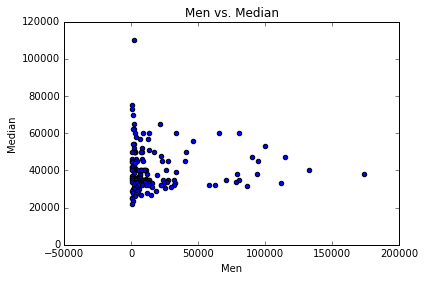

In [27]:
#no correlation between men and median salary
ax = clean_grads_df.plot(x='Men', y='Median', kind='scatter')
ax.set_title('Men vs. Median')

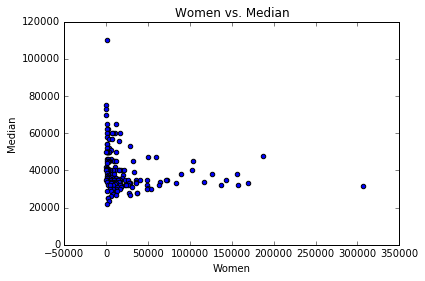

In [28]:
#no correlation between women and median salary
ax = clean_grads_df.plot(x='Women', y='Median', kind='scatter')
ax.set_title('Women vs. Median')

In [29]:
# Do students in more popular majors make more money?


#Do students that majored in subjects that were majority female make more money?

#Is there any link between the number of full-time employees and median salary?

## Histograms
Exploring the distribution of values

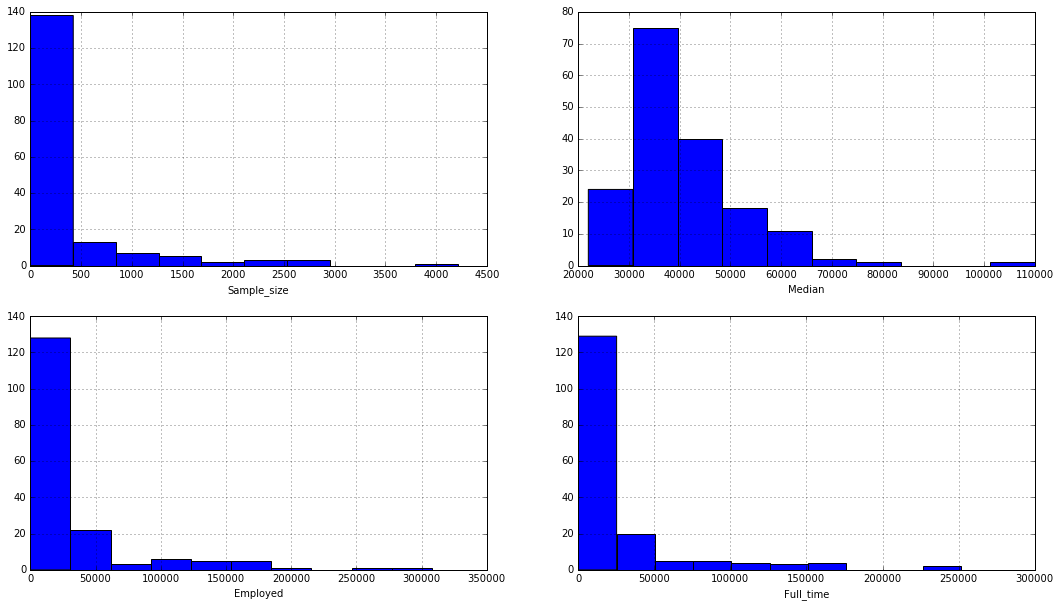

In [30]:
cols = ["Sample_size", "Median", "Employed", "Full_time"]

fig = plt.figure(figsize=(18,10))
for i in range(0,4):
    ax = fig.add_subplot(2,2,i+1)
    ax = clean_grads_df[cols[i]].hist()
    ax.set_xlabel(cols[i])

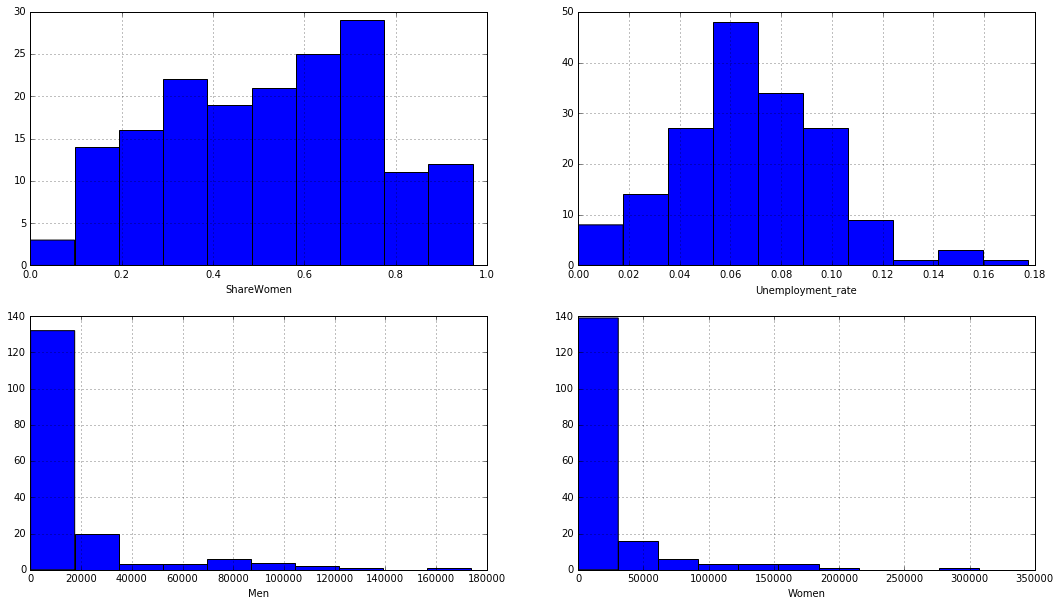

In [31]:
cols = ["ShareWomen", "Unemployment_rate", "Men", "Women"]

fig = plt.figure(figsize=(18,10))
for i in range(0,4):
    ax = fig.add_subplot(2,2,i+1)
    ax = clean_grads_df[cols[i]].hist()
    ax.set_xlabel(cols[i])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f47065f7cc0>,
      dtype=object)

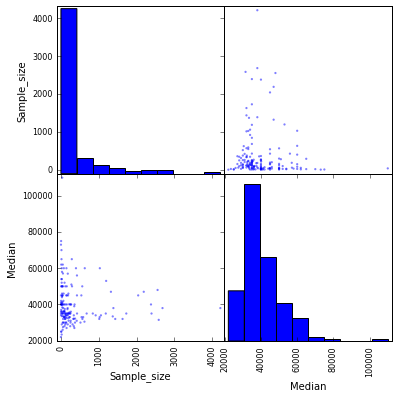

In [36]:
scatter_matrix(clean_grads_df[['Sample_size', 'Median']], figsize=(6,6))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f47065cd358>,
      dtype=object)

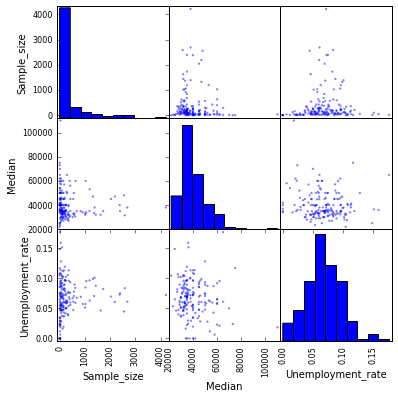

In [38]:
scatter_matrix(clean_grads_df[['Sample_size', 'Median', 'Unemployment_rate']], figsize=(6,6))

## Bar plots

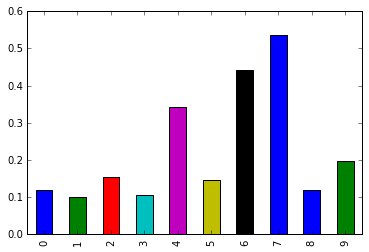

In [40]:
clean_grads_df[:10]['ShareWomen'].plot(kind='bar')

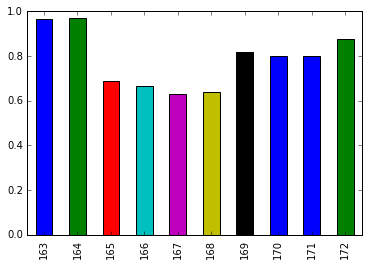

In [42]:

clean_grads[:10].plot.bar(x='Major', y='ShareWomen', legend=False)

In [32]:
#How many majors are predominatly male? Predominanly female?

In [33]:
# Which majors have the most students?